In [31]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, merge, Input, concatenate, add
from keras.layers import Conv2D, MaxPooling2D,MaxPool2D, ZeroPadding2D, AveragePooling2D, GlobalAveragePooling2D
from keras.utils import np_utils
from keras.models import model_from_json
from keras import backend as K
from keras.preprocessing import image
from keras.optimizers import SGD, RMSprop
from keras.utils.data_utils import get_file
import random
from keras.applications import VGG16, ResNet50, VGG19
import os
import itertools
import cv2
from sklearn.metrics import log_loss, confusion_matrix
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings
warnings.simplefilter("ignore", UserWarning)

# Any results you write to the current directory are saved as output.

In [10]:

from keras.preprocessing.image import ImageDataGenerator
image_width = 150
image_height = 150

img_rows =  224
img_cols =  224
image_size = (image_width, image_height)

data_datagen = ImageDataGenerator(rescale=1.0/255,  validation_split=0.15)

train_generator = data_datagen.flow_from_directory(
        '../input/simpsons_dataset/simpsons_dataset',  # this is the target directory
        target_size=image_size,  # all images will be resized to 224x224
        batch_size=16,
        class_mode='categorical',
         subset='training')

validation_generator = data_datagen.flow_from_directory(
        '../input/simpsons_dataset/simpsons_dataset',  # this is the target directory
        target_size=image_size,  # all images will be resized to 224x224
        batch_size=16,
        class_mode='categorical',
         subset='validation')



Found 11745 images belonging to 10 classes.
Found 2066 images belonging to 10 classes.


In [27]:

def create_model(p):
    model = Sequential()
    model.add(Conv2D(filters=100, kernel_size=(5,5), activation='relu', input_shape=(150,150,3)))
    model.add(Conv2D(filters=100, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(p))
    model.add(Flatten())
    model.add(Dense(units= 64, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    return model

 # 2 -a 

In [28]:
small_model = create_model(0)

small_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 146, 146, 100)     7600      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 142, 142, 100)     250100    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 71, 71, 100)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 71, 71, 100)       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 504100)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                32262464  
_________________________________________________________________
dense_18 (Dense)             (None, 10)                650       
Total para

In [44]:
def compile_model(lr, epochs):
    small_model.compile(optimizer=RMSprop(lr=lr),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

    N_TRAIN = 11745
    N_VAL = 2066 
    history = small_model.fit_generator(
        train_generator,
        steps_per_epoch=(N_TRAIN // 32),
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=(N_VAL // 32))
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend(loc='best')

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc='best');
    
    

# 2 b- Lr = 0.001, Epoch = 10

In [37]:
compile_model(0.001, 10)

Epoch 1/10
367/367 [==============================] - 89s 243ms/step - loss: 14.5804 - acc: 0.0928 - val_loss: 14.7644 - val_acc: 0.0840
Epoch 2/10
367/367 [==============================] - 82s 222ms/step - loss: 14.8115 - acc: 0.0811 - val_loss: 14.6542 - val_acc: 0.0908
Epoch 3/10
367/367 [==============================] - 81s 219ms/step - loss: 14.6578 - acc: 0.0906 - val_loss: 14.8255 - val_acc: 0.0802
Epoch 4/10
367/367 [==============================] - 80s 219ms/step - loss: 14.7649 - acc: 0.0840 - val_loss: 14.6228 - val_acc: 0.0928
Epoch 5/10
367/367 [==============================] - 80s 219ms/step - loss: 14.7786 - acc: 0.0831 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
367/367 [==============================] - 80s 219ms/step - loss: 14.6468 - acc: 0.0913 - val_loss: 14.8746 - val_acc: 0.0771
Epoch 7/10
367/367 [==============================] - 80s 218ms/step - loss: 14.6002 - acc: 0.0942 - val_loss: 14.7297 - val_acc: 0.0861
Epoch 8/10
367/367 [=====================

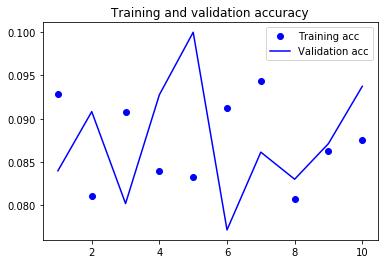

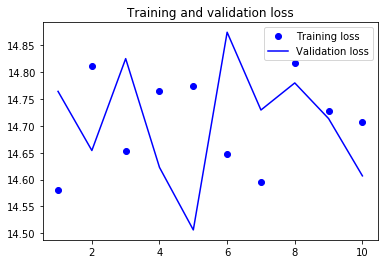

# 2 b- Lr = 0.001, Epoch = 50

Epoch 1/50
367/367 [==============================] - 82s 223ms/step - loss: 14.6578 - acc: 0.0906 - val_loss: 14.9218 - val_acc: 0.0742
Epoch 2/50
367/367 [==============================] - 80s 217ms/step - loss: 14.7264 - acc: 0.0863 - val_loss: 14.5701 - val_acc: 0.0960
Epoch 3/50
367/367 [==============================] - 80s 218ms/step - loss: 14.7182 - acc: 0.0869 - val_loss: 14.5913 - val_acc: 0.0947
Epoch 4/50
367/367 [==============================] - 80s 217ms/step - loss: 14.7566 - acc: 0.0845 - val_loss: 14.7457 - val_acc: 0.0851
Epoch 5/50
367/367 [==============================] - 80s 218ms/step - loss: 14.6715 - acc: 0.0897 - val_loss: 14.8116 - val_acc: 0.0811
Epoch 6/50
367/367 [==============================] - 80s 217ms/step - loss: 14.7456 - acc: 0.0852 - val_loss: 14.7776 - val_acc: 0.0832
Epoch 7/50
367/367 [==============================] - 80s 218ms/step - loss: 14.7182 - acc: 0.0869 - val_loss: 14.7329 - val_acc: 0.0859
Epoch 8/50
367/367 [=====================

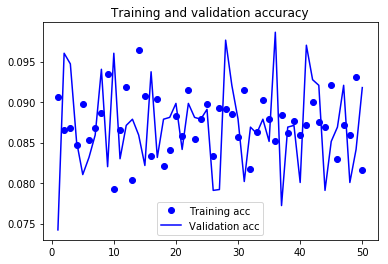

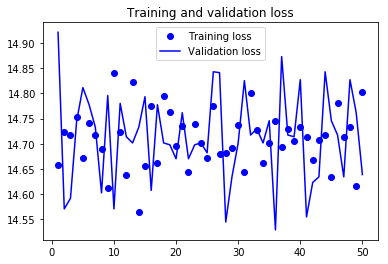

In [45]:
compile_model(0.001, 50)

# 2 b- Lr = 0.001, Epoch = 100

Epoch 1/100
367/367 [==============================] - 82s 223ms/step - loss: 14.7676 - acc: 0.0838 - val_loss: 14.6340 - val_acc: 0.0921
Epoch 2/100
367/367 [==============================] - 80s 218ms/step - loss: 14.6688 - acc: 0.0899 - val_loss: 14.7172 - val_acc: 0.0869
Epoch 3/100
367/367 [==============================] - 80s 218ms/step - loss: 14.7539 - acc: 0.0846 - val_loss: 14.9372 - val_acc: 0.0733
Epoch 4/100
367/367 [==============================] - 80s 218ms/step - loss: 14.6496 - acc: 0.0911 - val_loss: 14.5441 - val_acc: 0.0977
Epoch 5/100
367/367 [==============================] - 80s 218ms/step - loss: 14.7402 - acc: 0.0855 - val_loss: 14.8414 - val_acc: 0.0792
Epoch 6/100
367/367 [==============================] - 80s 218ms/step - loss: 14.6935 - acc: 0.0884 - val_loss: 14.7015 - val_acc: 0.0879
Epoch 7/100
367/367 [==============================] - 80s 219ms/step - loss: 14.6331 - acc: 0.0921 - val_loss: 14.6180 - val_acc: 0.0931
Epoch 8/100
367/367 [=============

367/367 [==============================] - 80s 219ms/step - loss: 14.6852 - acc: 0.0889 - val_loss: 14.4744 - val_acc: 0.1020
Epoch 61/100
367/367 [==============================] - 80s 219ms/step - loss: 14.6688 - acc: 0.0899 - val_loss: 14.8589 - val_acc: 0.0781
Epoch 62/100
367/367 [==============================] - 80s 218ms/step - loss: 14.6935 - acc: 0.0884 - val_loss: 14.9372 - val_acc: 0.0733
Epoch 63/100
367/367 [==============================] - 80s 219ms/step - loss: 14.7456 - acc: 0.0851 - val_loss: 14.6542 - val_acc: 0.0908
Epoch 64/100
367/367 [==============================] - 80s 218ms/step - loss: 14.7292 - acc: 0.0862 - val_loss: 14.3467 - val_acc: 0.1099
Epoch 65/100
367/367 [==============================] - 80s 219ms/step - loss: 14.6935 - acc: 0.0884 - val_loss: 14.8274 - val_acc: 0.0801
Epoch 66/100
367/367 [==============================] - 80s 218ms/step - loss: 14.7237 - acc: 0.0865 - val_loss: 14.6818 - val_acc: 0.0891
Epoch 67/100
367/367 [==================

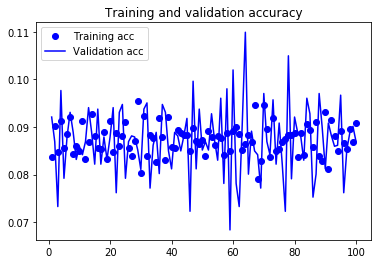

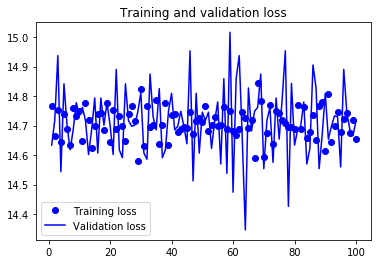

In [46]:
compile_model(0.001, 100)

# 2 b- Lr = 0.01, Epoch = 10

Epoch 1/10
367/367 [==============================] - 82s 222ms/step - loss: 14.7402 - acc: 0.0855 - val_loss: 14.7616 - val_acc: 0.0842
Epoch 2/10
367/367 [==============================] - 80s 217ms/step - loss: 14.6688 - acc: 0.0899 - val_loss: 14.6385 - val_acc: 0.0918
Epoch 3/10
367/367 [==============================] - 79s 216ms/step - loss: 14.7209 - acc: 0.0867 - val_loss: 14.7137 - val_acc: 0.0871
Epoch 4/10
367/367 [==============================] - 79s 216ms/step - loss: 14.7731 - acc: 0.0834 - val_loss: 14.7487 - val_acc: 0.0850
Epoch 5/10
367/367 [==============================] - 79s 216ms/step - loss: 14.6880 - acc: 0.0887 - val_loss: 14.7297 - val_acc: 0.0861
Epoch 6/10
367/367 [==============================] - 79s 216ms/step - loss: 14.6387 - acc: 0.0918 - val_loss: 14.6857 - val_acc: 0.0889
Epoch 7/10
367/367 [==============================] - 79s 216ms/step - loss: 14.7072 - acc: 0.0875 - val_loss: 14.7935 - val_acc: 0.0822
Epoch 8/10
367/367 [=====================

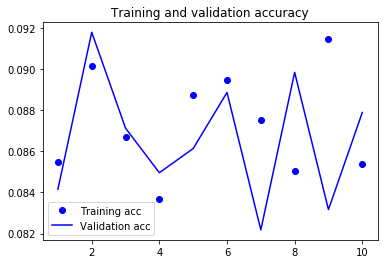

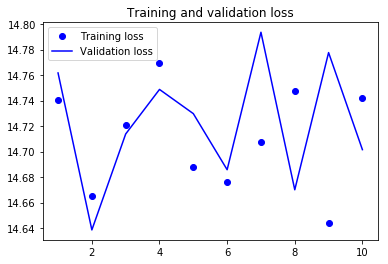

In [47]:
compile_model(0.01, 10)

# 2 b- Lr = 0.01, Epoch = 50

In [ ]:
compile_model(0.01, 50)

# 2 b- Lr = 0.01, Epoch = 100

In [ ]:
compile_model(0.01, 100)

# 2 b- Lr = 0.1, Epoch = 10

In [ ]:
compile_model(0.01, 10)

# 2 b- Lr = 0.1, Epoch = 50

compile_model(0.1, 50)

# 2 b- Lr = 0.1, Epoch = 100

compile_model(0.1, 100)